In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [3]:
df = pd.read_csv('jobs_in_data.csv')

In [4]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
duplicated_row = df.duplicated().sum()
missing_value = df.isnull().sum()
print("Duplicated Row: ", duplicated_row)
print("Column with missing value: ", missing_value)

Duplicated Row:  4014
Column with missing value:  work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [6]:
df_clear = df.drop_duplicates(keep='first')
df_clear.shape
duplicated_row = df_clear.duplicated().sum()
print("Duplicated data: ", duplicated_row)

Duplicated data:  0


Hot Encoding untuk semua  kolom yang memiliki Multiple Categorical Value

In [7]:
df = pd.concat([df.drop('job_title', axis = 1),pd.get_dummies(df.job_title).add_prefix('title_')], axis = 1)
df = pd.concat([df.drop('job_category', axis = 1),pd.get_dummies(df.job_category).add_prefix('category_')], axis = 1)
df = pd.concat([df.drop('experience_level', axis = 1),pd.get_dummies(df.experience_level).add_prefix('level_')], axis = 1)
df = pd.concat([df.drop('employment_type', axis = 1),pd.get_dummies(df.employment_type).add_prefix('type_')], axis = 1)
df = pd.concat([df.drop('work_setting', axis = 1),pd.get_dummies(df.work_setting).add_prefix('setting_')], axis = 1)
df = pd.concat([df.drop('company_location', axis = 1),pd.get_dummies(df.company_location).add_prefix('location_')], axis = 1)
df = pd.concat([df.drop('company_size', axis = 1),pd.get_dummies(df.company_size).add_prefix('size_')], axis = 1)

<AxesSubplot:>

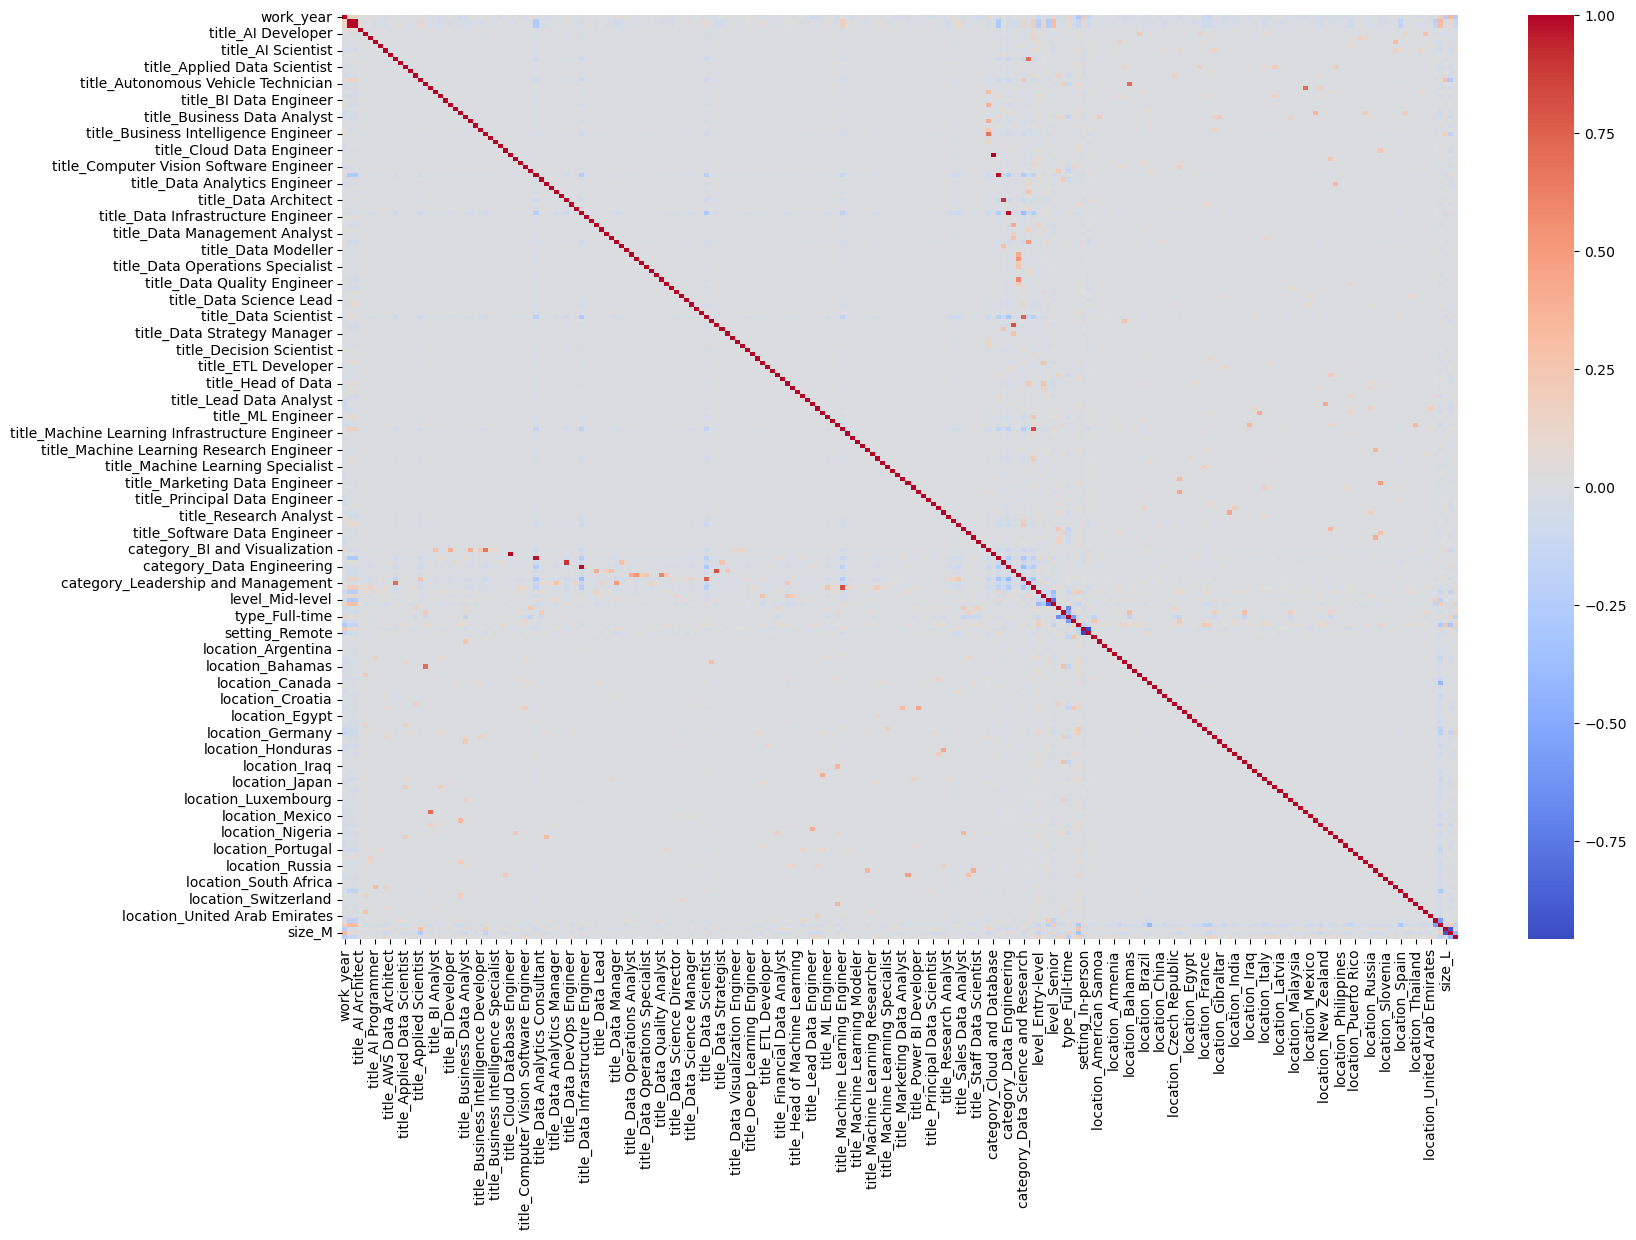

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [9]:
df.corr()

,work_year,salary,salary_in_usd,title_AI Architect,title_AI Developer,title_AI Engineer,title_AI Programmer,title_AI Research Engineer,title_AI Scientist,title_AWS Data Architect,...,location_Switzerland,location_Thailand,location_Turkey,location_Ukraine,location_United Arab Emirates,location_United Kingdom,location_United States,size_L,size_M,size_S
work_year,1.000000,0.160708,0.166003,0.016528,0.015553,0.028663,0.001761,-0.000416,-0.050191,0.004768,...,-0.016047,-0.035042,-0.033854,0.011683,-0.049207,-0.023530,0.192920,-0.241895,0.327380,-0.241855
salary,0.160708,1.000000,0.991309,0.055822,-0.006508,0.018840,-0.027605,-0.026876,-0.025990,0.017568,...,-0.019897,-0.021934,0.006207,-0.011389,-0.014059,-0.206316,0.333267,-0.032345,0.081360,-0.118377
salary_in_usd,0.166003,0.991309,1.000000,0.056746,-0.006365,0.021019,-0.029827,-0.025218,-0.037395,0.017627,...,-0.017805,-0.022144,-0.046849,-0.011616,-0.014260,-0.162969,0.320795,-0.042942,0.093605,-0.124171
title_AI Architect,0.016528,0.055822,0.056746,1.000000,-0.001574,-0.002227,-0.000829,-0.000741,-0.001574,-0.000371,...,-0.000829,-0.000371,-0.000829,-0.000908,-0.000642,-0.008047,0.013898,0.011457,-0.008444,-0.004712
title_AI Developer,0.015553,-0.006508,-0.006365,-0.001574,1.000000,-0.002729,-0.001015,-0.000908,-0.001928,-0.000454,...,-0.001015,-0.000454,-0.001015,0.287934,-0.000786,-0.009859,-0.062567,0.005043,-0.035076,0.069712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_United Kingdom,-0.023530,-0.206316,-0.162969,-0.008047,-0.009859,0.002198,-0.005192,0.043734,-0.009859,-0.002322,...,-0.005192,-0.002322,-0.005192,-0.005688,-0.004022,1.000000,-0.578985,-0.020098,0.014420,0.009164
location_United States,0.192920,0.333267,0.320795,0.013898,-0.062567,-0.021990,-0.059630,-0.037994,-0.069803,0.004010,...,-0.059630,-0.026662,-0.059630,-0.065325,-0.046184,-0.578985,1.000000,-0.110144,0.177278,-0.174701
size_L,-0.241895,-0.032345,-0.042942,0.011457,0.005043,0.000774,0.027287,0.012967,0.050011,0.035073,...,0.044339,0.035073,0.027287,-0.007468,0.016732,-0.020098,-0.110144,1.000000,-0.899701,-0.038764
size_M,0.327380,0.081360,0.093605,-0.008444,-0.035076,-0.002974,-0.039314,-0.010698,-0.092782,-0.031555,...,-0.070575,-0.031555,-0.039314,-0.005969,-0.054662,0.014420,0.177278,-0.899701,1.000000,-0.401303


In [10]:
correlations = df.corr()['salary'].abs()
sorted_correlation = correlations.sort_values()
num_cols_to_drop = int (0.8 * len(df.columns))
cols_to_drop = sorted_correlation.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)


In [11]:
df_dropped

,work_year,salary_currency,salary,salary_in_usd,employee_residence,title_AI Architect,title_Applied Scientist,title_Data Analyst,title_Data Manager,title_Data Science Consultant,...,location_Germany,location_Greece,location_Italy,location_Netherlands,location_Portugal,location_Spain,location_United Kingdom,location_United States,size_M,size_S
0,2023,EUR,88000,95012,Germany,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2023,USD,186000,186000,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2023,USD,81800,81800,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,2023,USD,212000,212000,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2023,USD,93300,93300,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,USD,165000,165000,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9351,2020,USD,412000,412000,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9352,2021,USD,151000,151000,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9353,2020,USD,105000,105000,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


<AxesSubplot:>

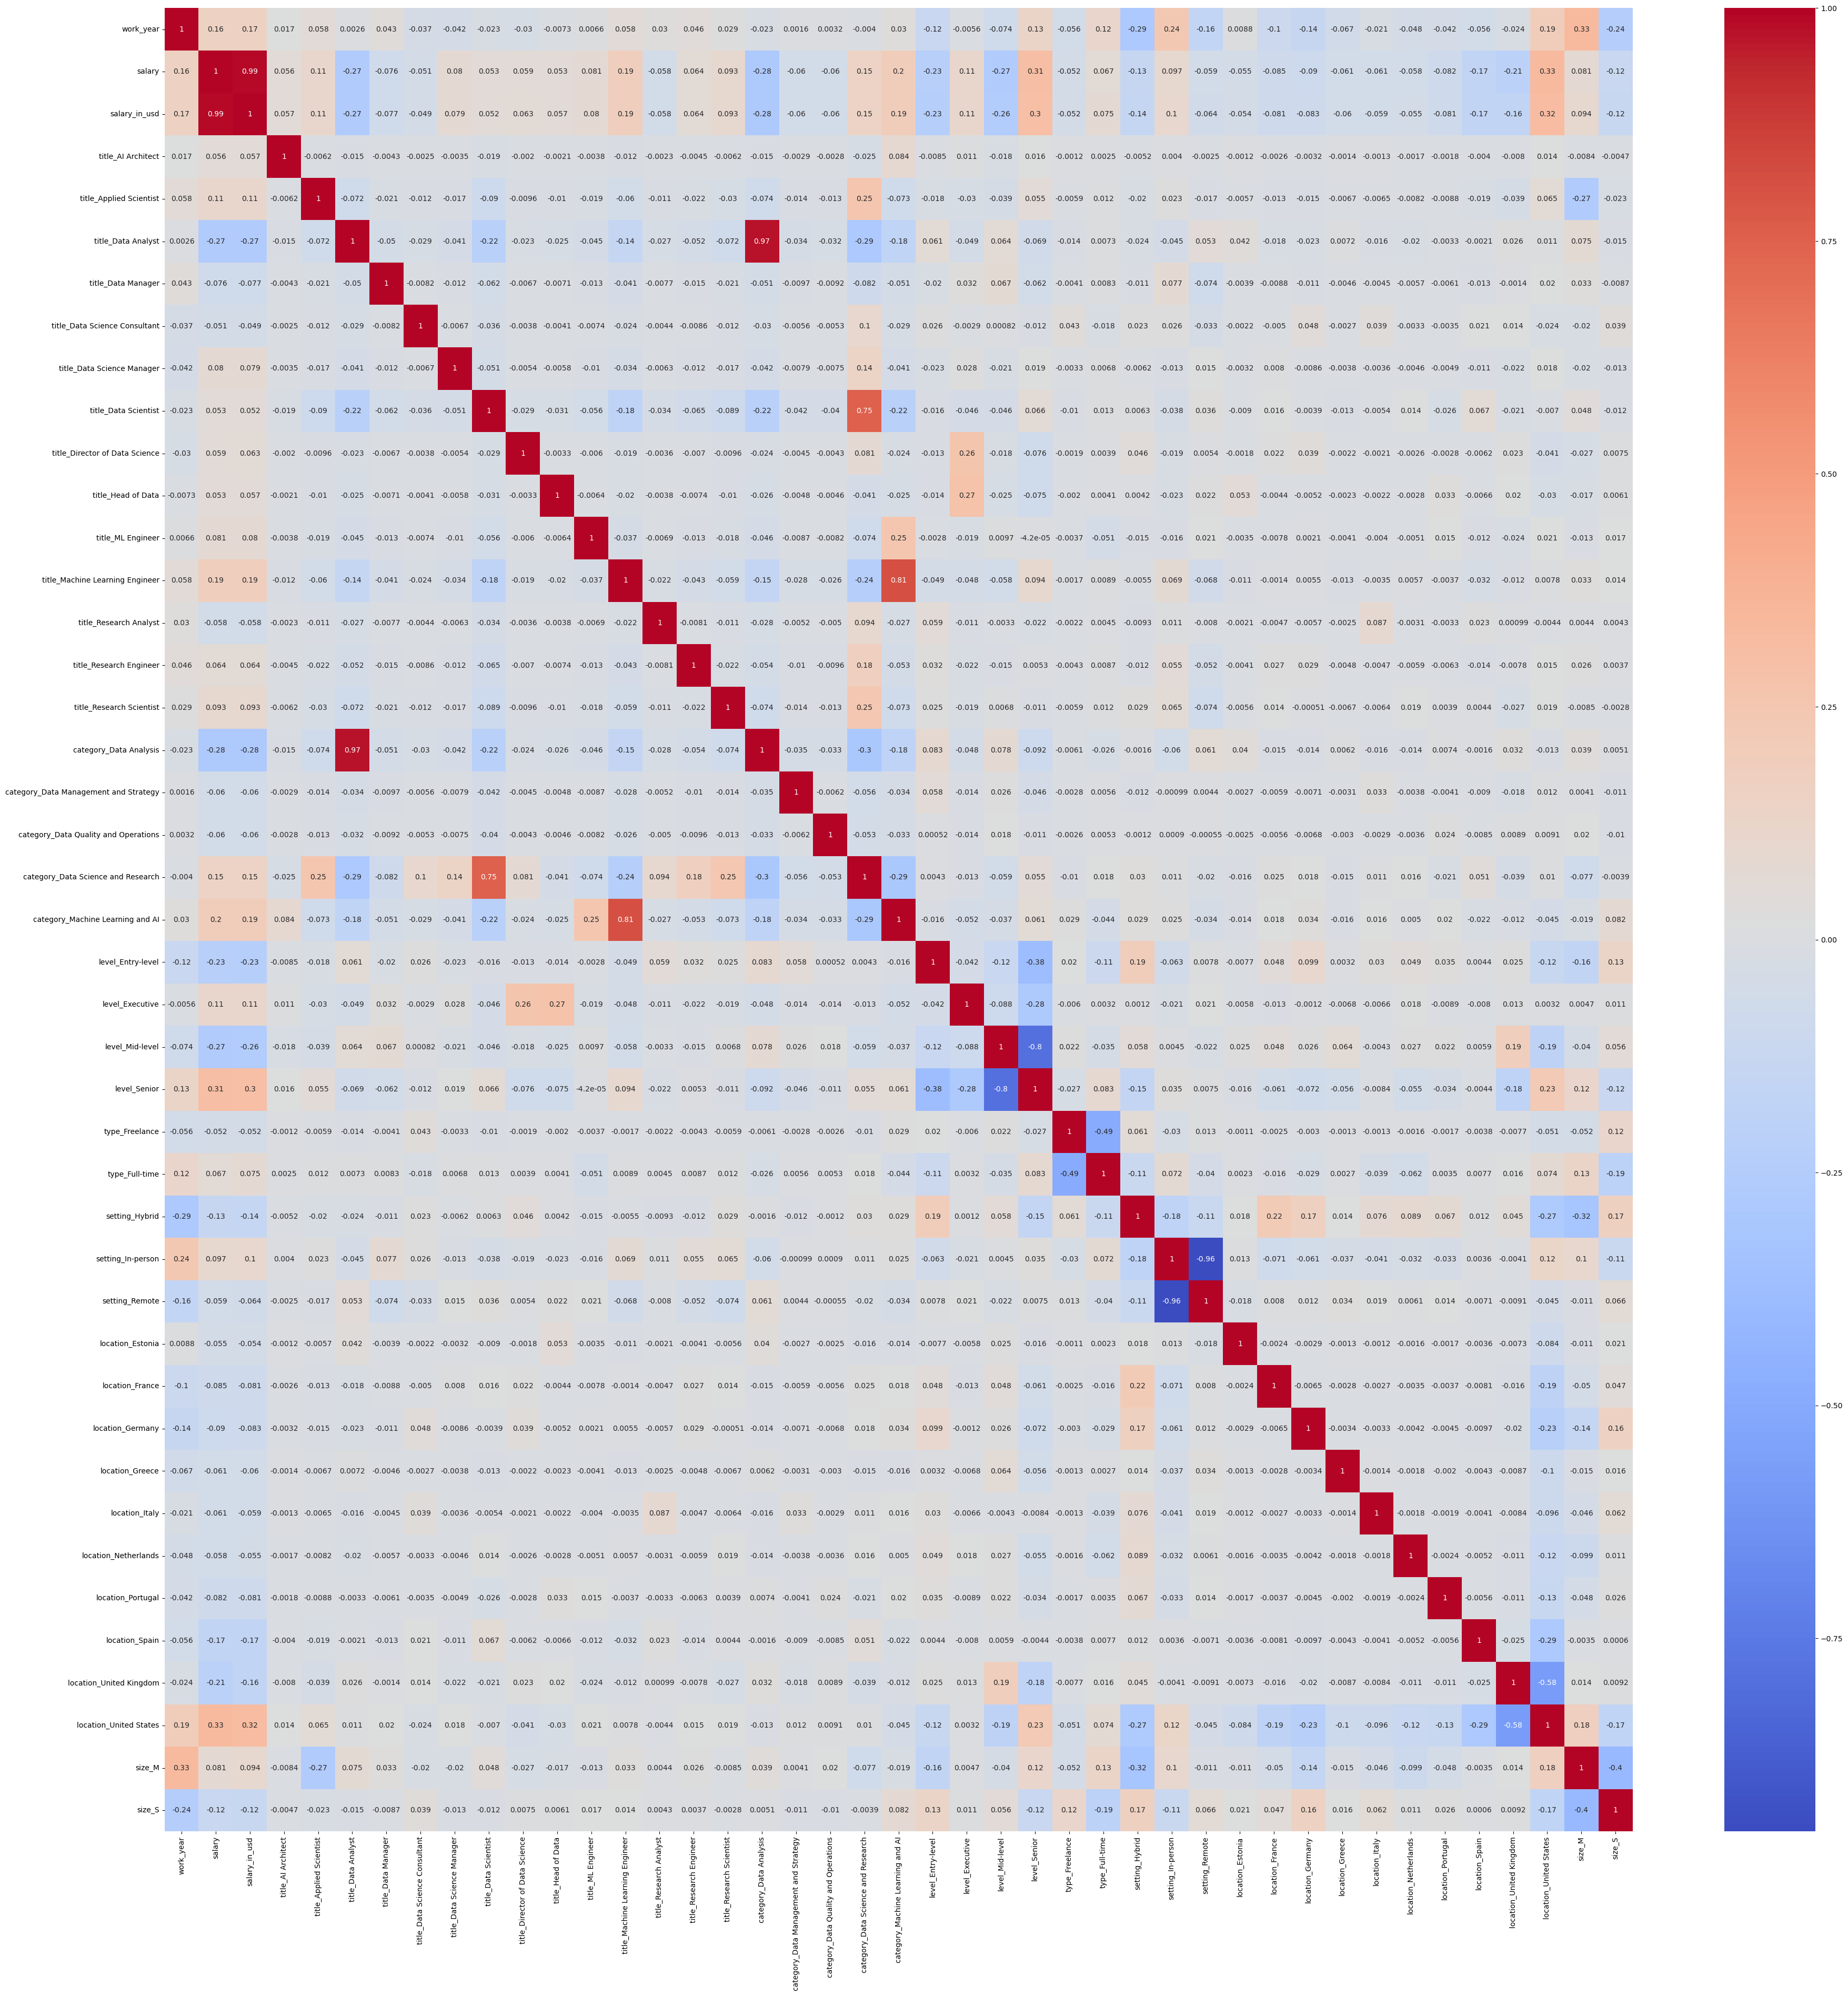

In [12]:
plt.figure(figsize=(45,45))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.32)


In [14]:
train_df

,work_year,salary_currency,salary,salary_in_usd,employee_residence,title_AI Architect,title_AI Developer,title_AI Engineer,title_AI Programmer,title_AI Research Engineer,...,location_Switzerland,location_Thailand,location_Turkey,location_Ukraine,location_United Arab Emirates,location_United Kingdom,location_United States,size_L,size_M,size_S
606,2023,USD,147000,147000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1265,2023,USD,87500,87500,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8453,2022,USD,190000,190000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5908,2023,USD,215000,215000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6946,2023,USD,163625,163625,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7484,2023,USD,160000,160000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1304,2023,USD,179000,179000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2839,2023,USD,309000,309000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8347,2022,USD,200000,200000,United States,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


train_x = train_df.drop(['salary_currency', 'salary', 'salary_in_usd'], axis=1)
train_y = train_df['salary_in_usd']

test_x = train_df.drop(['salary_currency', 'salary', 'salary_in_usd'], axis=1)
test_y = train_df['salary_in_usd']

encoder = OneHotEncoder()
categorical_features = ['employee_residence']
train_x_encoded = encoder.fit_transform(train_x[categorical_features])
test_x_encoded = encoder.fit_transform(test_x[categorical_features])
label_encoder = LabelEncoder()
train_x_encoded = train_x.copy()
test_x_encoded = test_x.copy()
for feature in categorical_features:
    train_x_encoded[feature] = label_encoder.fit_transform(train_x_encoded[feature])
    test_x_encoded[feature] = label_encoder.fit_transform(test_x_encoded[feature])

forest = RandomForestClassifier()
forest.fit(train_x_encoded, train_y)
accuracy = forest.score(test_x_encoded, test_y)
print(accuracy)
pred_y = forest.predict(test_x_encoded)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator,

KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

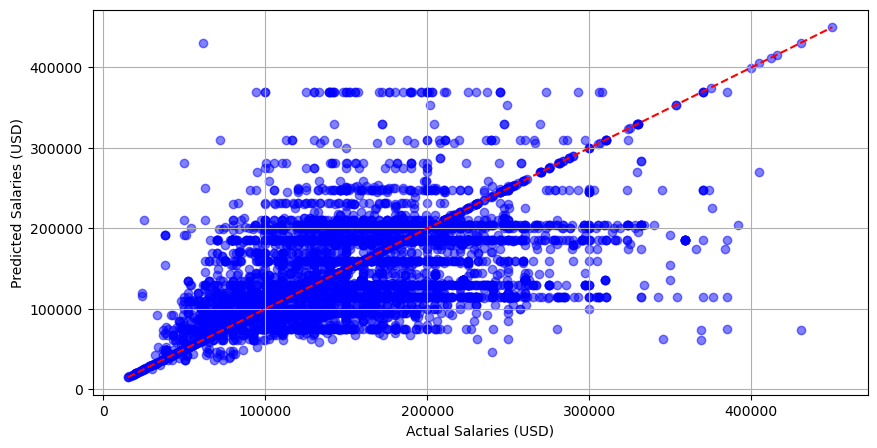

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(test_y, pred_y, color = 'blue', alpha=0.5)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color ='red', linestyle='--')
plt.xlabel('Actual Salaries (USD)')
plt.ylabel('Predicted Salaries (USD)')
plt.grid(True)
plt.show

In [ ]:
forest.score(test_x_encoded, test_y)

0.2094010375727087